In [1]:
import numpy as np
import cv2
import PIL
import tensorflow
import sklearn
import pandas
import os
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/visionv2/trainData.txt

/content/drive/MyDrive/visionv2/trainData.txt


In [ ]:
singleTrainFaces = os.listdir('/content/drive/MyDrive/visionv2/singleFaces/train')

In [ ]:
print(len(singleTrainFaces))

4631


In [ ]:
trainFilecontents = []

with open('/content/drive/MyDrive/visionv2/trainData.txt') as file:
  for i in file:
    trainFilecontents.append(i)

In [ ]:
# Get only the images with single faces being used from text file

singleTrainText = []

for i in range (len(trainFilecontents)):
  if ('.jpg' in trainFilecontents[i]) and (int(trainFilecontents[i + 1]) == 1):
    singleTrainText.append((trainFilecontents[i]).strip())
    singleTrainText.append((trainFilecontents[i + 1]).strip())
    singleTrainText.append((trainFilecontents[i + 2]).strip())

In [ ]:
print(singleTrainText)

['0--Parade/0_Parade_marchingband_1_849.jpg', '1', '449 330 122 149 0 0 0 0 0 0', '0--Parade/0_Parade_Parade_0_904.jpg', '1', '361 98 263 339 0 0 0 0 0 0', '0--Parade/0_Parade_Parade_0_577.jpg', '1', '294 300 455 582 0 0 0 0 0 0', '0--Parade/0_Parade_Parade_0_883.jpg', '1', '532 168 219 287 0 0 0 0 0 0', '0--Parade/0_Parade_marchingband_1_873.jpg', '1', '439 182 185 254 0 0 0 0 0 0', '0--Parade/0_Parade_marchingband_1_925.jpg', '1', '273 327 276 372 0 0 0 0 0 0', '0--Parade/0_Parade_Parade_0_761.jpg', '1', '207 459 330 441 0 1 0 0 0 0', '0--Parade/0_Parade_Parade_0_780.jpg', '1', '781 769 63 99 0 0 1 0 0 0', '0--Parade/0_Parade_marchingband_1_641.jpg', '1', '349 179 171 221 0 0 0 0 0 0', '0--Parade/0_Parade_Parade_0_803.jpg', '1', '443 129 153 263 0 0 0 0 0 0', '0--Parade/0_Parade_Parade_0_123.jpg', '1', '342 324 114 130 0 0 0 0 0 0', '0--Parade/0_Parade_marchingband_1_431.jpg', '1', '254 416 150 144 0 0 1 0 0 0', '0--Parade/0_Parade_Parade_0_724.jpg', '1', '396 184 52 61 0 0 1 0 0 0',

In [ ]:
print(len(singleTrainText))

13893


In [ ]:
tmp = []
newTmp = []

for i in range (len(singleTrainText)):

  if (type(singleTrainText[i]) == str):

    if ( '.jpg' in singleTrainText[i]):
      singleTrainText[i + 1] = int(singleTrainText[i + 1])
      tmp = singleTrainText[i + 2].split(' ')

      for j in range(len(tmp)):
        tmp[j] = int(tmp[j])


      singleTrainText[i + 2] = tmp[0:4]


In [ ]:
print(singleTrainText)

['0--Parade/0_Parade_marchingband_1_849.jpg', 1, [449, 330, 122, 149], '0--Parade/0_Parade_Parade_0_904.jpg', 1, [361, 98, 263, 339], '0--Parade/0_Parade_Parade_0_577.jpg', 1, [294, 300, 455, 582], '0--Parade/0_Parade_Parade_0_883.jpg', 1, [532, 168, 219, 287], '0--Parade/0_Parade_marchingband_1_873.jpg', 1, [439, 182, 185, 254], '0--Parade/0_Parade_marchingband_1_925.jpg', 1, [273, 327, 276, 372], '0--Parade/0_Parade_Parade_0_761.jpg', 1, [207, 459, 330, 441], '0--Parade/0_Parade_Parade_0_780.jpg', 1, [781, 769, 63, 99], '0--Parade/0_Parade_marchingband_1_641.jpg', 1, [349, 179, 171, 221], '0--Parade/0_Parade_Parade_0_803.jpg', 1, [443, 129, 153, 263], '0--Parade/0_Parade_Parade_0_123.jpg', 1, [342, 324, 114, 130], '0--Parade/0_Parade_marchingband_1_431.jpg', 1, [254, 416, 150, 144], '0--Parade/0_Parade_Parade_0_724.jpg', 1, [396, 184, 52, 61], '0--Parade/0_Parade_Parade_0_632.jpg', 1, [442, 164, 116, 146], '0--Parade/0_Parade_Parade_0_242.jpg', 1, [530, 394, 196, 269], '0--Parade/0_P

In [ ]:
print(len(singleTrainText))
print(len(singleTrainFaces))

13893
4631


In [ ]:
print(singleTrainFaces)

['52_Photographers_photographertakingphoto_52_725.jpg', '52_Photographers_taketouristphotos_52_590.jpg', '52_Photographers_photographertakingphoto_52_785.jpg', '52_Photographers_photographertakingphoto_52_829.jpg', '52_Photographers_photographertakingphoto_52_552.jpg', '52_Photographers_photographertakingphoto_52_46.jpg', '52_Photographers_photographertakingphoto_52_126.jpg', '52_Photographers_photographertakingphoto_52_153.jpg', '52_Photographers_photographertakingphoto_52_839.jpg', '52_Photographers_photographertakingphoto_52_512.jpg', '52_Photographers_photographertakingphoto_52_224.jpg', '52_Photographers_photographertakingphoto_52_336.jpg', '52_Photographers_photographertakingphoto_52_110.jpg', '52_Photographers_photographertakingphoto_52_377.jpg', '52_Photographers_taketouristphotos_52_559.jpg', '52_Photographers_photographertakingphoto_52_229.jpg', '52_Photographers_photographertakingphoto_52_548.jpg', '52_Photographers_photographertakingphoto_52_167.jpg', '52_Photographers_phot

In [ ]:
# Create Tuple and Dict to feed into model
trainTuples = []
tupl = ()
params = []


count = 0
for i in singleTrainFaces:
  for j in range (len(singleTrainText)):
    #print(singleText[j])
    if type(singleTrainText[j]) == str:
      if i in singleTrainText[j]:
        elem = (i, singleTrainText[j + 2])
        trainTuples.append(elem)

In [ ]:
print(len(trainTuples))

4631


In [ ]:
print(trainTuples)

[('52_Photographers_photographertakingphoto_52_725.jpg', [435, 216, 195, 315]), ('52_Photographers_taketouristphotos_52_590.jpg', [218, 322, 80, 100]), ('52_Photographers_photographertakingphoto_52_785.jpg', [334, 197, 512, 703]), ('52_Photographers_photographertakingphoto_52_829.jpg', [300, 66, 406, 560]), ('52_Photographers_photographertakingphoto_52_552.jpg', [240, 156, 182, 124]), ('52_Photographers_photographertakingphoto_52_46.jpg', [535, 225, 106, 144]), ('52_Photographers_photographertakingphoto_52_126.jpg', [448, 154, 230, 338]), ('52_Photographers_photographertakingphoto_52_153.jpg', [369, 125, 215, 322]), ('52_Photographers_photographertakingphoto_52_839.jpg', [205, 185, 412, 597]), ('52_Photographers_photographertakingphoto_52_512.jpg', [358, 268, 133, 126]), ('52_Photographers_photographertakingphoto_52_224.jpg', [582, 246, 82, 92]), ('52_Photographers_photographertakingphoto_52_336.jpg', [401, 221, 27, 51]), ('52_Photographers_photographertakingphoto_52_110.jpg', [704, 24

In [ ]:
!ls /content/drive/MyDrive/visionv2/valData.txt

/content/drive/MyDrive/visionv2/valData.txt


In [ ]:
singleValFaces = os.listdir('/content/drive/MyDrive/visionv2/singleFaces/val')

In [ ]:
# Opening val contents from text file

valContents = []

with open('/content/drive/MyDrive/visionv2/valData.txt') as file:
  for i in file:
    valContents.append(i)

In [ ]:
valTextContents = []

for i in range (len(valContents)):
  if ('.jpg' in valContents[i]) and (int(valContents[i + 1]) == 1):
    valTextContents.append((valContents[i]).strip())
    valTextContents.append((valContents[i + 1]).strip())
    valTextContents.append((valContents[i + 2]).strip())

In [ ]:
print(len(valTextContents))

3366


In [ ]:
# Obtaining contents for validation text file

tmp = []
newTmp = []

for i in range (len(valTextContents)):

  if (type(valTextContents[i]) == str):

    if ( '.jpg' in valTextContents[i]):
      valTextContents[i + 1] = int(valTextContents[i + 1])
      tmp = valTextContents[i + 2].split(' ')

      for j in range(len(tmp)):
        tmp[j] = int(tmp[j])


      valTextContents[i + 2] = tmp[0:4]


In [ ]:
print(valTextContents)

['0--Parade/0_Parade_Parade_0_829.jpg', 1, [501, 160, 285, 443], '0--Parade/0_Parade_Parade_0_275.jpg', 1, [0, 0, 0, 0], '0--Parade/0_Parade_marchingband_1_818.jpg', 1, [643, 336, 324, 553], '0--Parade/0_Parade_Parade_0_246.jpg', 1, [162, 552, 590, 380], '0--Parade/0_Parade_marchingband_1_356.jpg', 1, [314, 552, 114, 86], '0--Parade/0_Parade_Parade_0_468.jpg', 1, [444, 613, 285, 354], '0--Parade/0_Parade_Parade_0_461.jpg', 1, [518, 224, 92, 110], '0--Parade/0_Parade_Parade_0_757.jpg', 1, [238, 52, 204, 310], '1--Handshaking/1_Handshaking_Handshaking_1_766.jpg', 1, [390, 90, 260, 374], '1--Handshaking/1_Handshaking_Handshaking_1_362.jpg', 1, [104, 10, 482, 508], '1--Handshaking/1_Handshaking_Handshaking_1_522.jpg', 1, [702, 32, 96, 150], '1--Handshaking/1_Handshaking_Handshaking_1_314.jpg', 1, [344, 68, 72, 112], '1--Handshaking/1_Handshaking_Handshaking_1_465.jpg', 1, [388, 172, 400, 508], '1--Handshaking/1_Handshaking_Handshaking_1_94.jpg', 1, [381, 207, 237, 354], '1--Handshaking/1_H

In [ ]:
# Create Tuple and Dict to feed into model
valTuples = []
tupl = ()
params = []

count = 0
for i in range (len(singleValFaces)):
  for j in range (len(valTextContents)):
    if type(valTextContents[j]) == str:
      if singleValFaces[i] in valTextContents[j]:
        elem = (singleValFaces[i], valTextContents[j + 2])
        valTuples.append(elem)

In [ ]:
print(trainTuples)

[('52_Photographers_photographertakingphoto_52_725.jpg', [435, 216, 195, 315]), ('52_Photographers_taketouristphotos_52_590.jpg', [218, 322, 80, 100]), ('52_Photographers_photographertakingphoto_52_785.jpg', [334, 197, 512, 703]), ('52_Photographers_photographertakingphoto_52_829.jpg', [300, 66, 406, 560]), ('52_Photographers_photographertakingphoto_52_552.jpg', [240, 156, 182, 124]), ('52_Photographers_photographertakingphoto_52_46.jpg', [535, 225, 106, 144]), ('52_Photographers_photographertakingphoto_52_126.jpg', [448, 154, 230, 338]), ('52_Photographers_photographertakingphoto_52_153.jpg', [369, 125, 215, 322]), ('52_Photographers_photographertakingphoto_52_839.jpg', [205, 185, 412, 597]), ('52_Photographers_photographertakingphoto_52_512.jpg', [358, 268, 133, 126]), ('52_Photographers_photographertakingphoto_52_224.jpg', [582, 246, 82, 92]), ('52_Photographers_photographertakingphoto_52_336.jpg', [401, 221, 27, 51]), ('52_Photographers_photographertakingphoto_52_110.jpg', [704, 24

In [ ]:
print(valTuples)

[('13_Interview_Interview_2_People_Visible_13_239.jpg', [545, 66, 236, 337]), ('13_Interview_Interview_Sequences_13_33.jpg', [359, 169, 219, 292]), ('13_Interview_Interview_Sequences_13_764.jpg', [418, 100, 202, 286]), ('13_Interview_Interview_Sequences_13_121.jpg', [418, 144, 244, 350]), ('13_Interview_Interview_Sequences_13_347.jpg', [334, 160, 80, 118]), ('13_Interview_Interview_Sequences_13_373.jpg', [488, 190, 76, 90]), ('13_Interview_Interview_On_Location_13_426.jpg', [306, 294, 82, 108]), ('13_Interview_Interview_2_People_Visible_13_217.jpg', [336, 120, 282, 426]), ('13_Interview_Interview_On_Location_13_247.jpg', [368, 104, 204, 262]), ('13_Interview_Interview_Sequences_13_456.jpg', [220, 6, 576, 646]), ('14_Traffic_Traffic_14_654.jpg', [448, 352, 96, 115]), ('14_Traffic_Traffic_14_675.jpg', [570, 349, 107, 139]), ('14_Traffic_Traffic_14_253.jpg', [318, 120, 104, 120]), ('14_Traffic_Traffic_14_850.jpg', [594, 144, 86, 122]), ('15_Stock_Market_Stock_Market_15_731.jpg', [494, 314

In [ ]:
min = 1000
name = ''

for i in range (len(trainTuples)):
  if trainTuples[i][1][0] < min:
    min = trainTuples[i][1][1]
    name = trainTuples[i][0]

print(min)
print(name)

0
54_Rescue_firemanrescue_54_184.jpg


In [ ]:
train_dir = '/content/drive/MyDrive/visionv2/singleFaces/train/'
val_dir = '/content/drive/MyDrive/visionv2/singleFaces/val/'

In [ ]:
# Start training the model

IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 32
EPOCHS = 10
ORIGINAL_SIZE = 1024  # Assuming original image size is 1024x1024

# Load and preprocess data
def load_image_and_boxes(file_path, annotation_list, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    images = []
    boxes = []
    counter = 0
    for filename, box in annotation_list:
        counter = counter + 1
        print(counter)
        img_path = os.path.join(file_path, filename)
        try:
            with Image.open(img_path) as img:
                # Resize the image to the target size
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0  # Normalize to 0-1
                images.append(img_array)

                # Normalize box coordinates
                x, y, w, h = box
                x_rel = x / ORIGINAL_SIZE  # Use original size here
                y_rel = y / ORIGINAL_SIZE  # Use original size here
                w_rel = w / ORIGINAL_SIZE  # Use original size here
                h_rel = h / ORIGINAL_SIZE  # Use original size here
                boxes.append([x_rel, y_rel, w_rel, h_rel])
        except IOError:
            print(f"Error opening image {img_path}. Skipping.")

    return np.array(images), np.array(boxes)


# Define model architecture
def build_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), pooling='avg')
    x = base_model.output
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(4, activation='sigmoid')(x)  # Coordinates output
    model = Model(inputs=base_model.input, outputs=outputs)

    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

In [ ]:
# Load train dataset
train_images, train_boxes = load_image_and_boxes(train_dir, trainTuples)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# Load val dataset
val_images, val_boxes = load_image_and_boxes(val_dir, valTuples)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# Initialize and train the model
model = build_model()
history = model.fit(train_images, train_boxes, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_images, val_boxes))

# Save model
model.save('/content/drive/MyDrive/visionv2/face_detection_model.h5')

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
145/145 [==============================] - 78s 504ms/step - loss: 0.0390 - val_loss: 0.0194
Epoch 2/10
145/145 [==============================] - 63s 433ms/step - loss: 0.0217 - val_loss: 0.0151
Epoch 3/10
145/145 [==============================] - 73s 503ms/step - loss: 0.0170 - val_loss: 0.0140
Epoch 4/10
145/145 [==============================] - 61s 420ms/step - loss: 0.0149 - val_loss: 0.0136
Epoch 5/10
145/145 [==============================] - 72s 495ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 6/10
145/145 [==============================] - 64s 444ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 7/10
145/145 [==============================] - 65s 451ms/step - loss: 0.0113 - val_loss: 0.0127
Epoch 8/10
145/145 [==============================] - 61s 423ms/step - loss: 0.0107 - val_loss: 0.0124
Epoch 9/10
145/145 [==============================] - 75s 518ms/step - loss: 0.0100 - val_loss: 0.0124
Epoch 10/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


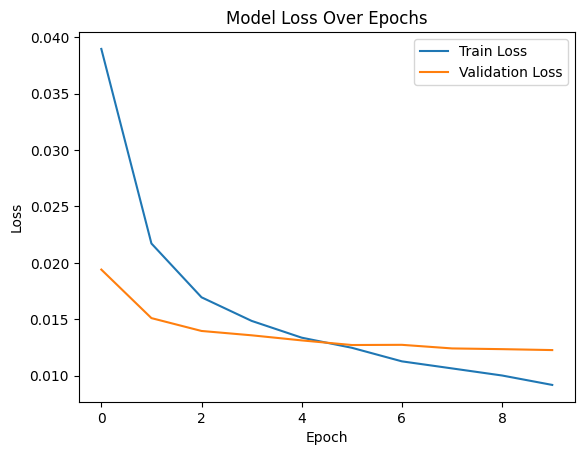

In [ ]:
# Plot training and validation losses

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [5]:
from tensorflow.keras.models import load_model

# Path to the saved model
model_path = '/content/drive/MyDrive/visionv2/face_detection_model.h5'
model = load_model(model_path)


In [6]:
def prepare_image(image_path, target_size=(128, 128)):
    with Image.open(image_path) as img:
        img = img.convert('RGB')  # Convert image to RGB
        img = img.resize(target_size)  # Resize the image to the same size used during training
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for model input
    return img_array


In [7]:
def predict_bounding_box(model, image_path):
    img_array = prepare_image(image_path)
    predictions = model.predict(img_array)
    return predictions[0]  # Assuming batch size of 1


In [18]:
# Example usage
image_path = '/content/drive/MyDrive/visionv2/myTest/newImg.png'
predicted_box = predict_bounding_box(model, image_path)

# Print or use the predicted bounding box
print("Predicted bounding box:", predicted_box)


1/1 [==============================] - 0s 31ms/step
Predicted bounding box: [0.17091262 0.18028858 0.5715705  0.7088248 ]


In [19]:
resized = []
for i in predicted_box:
  print(i * 1024)
  resized.append(i * 1024)

175.0145263671875
184.61550903320312
585.2882080078125
725.8366088867188


In [10]:
print(resized)

[315.4258728027344, 67.81584930419922, 488.8107604980469, 596.5294189453125]


In [ ]:
print(predicted_box)


[0.30803296 0.06622645 0.47735438 0.58254826]


In [ ]:
img = Image.open('/content/drive/MyDrive/visionv2/myTest/topLeft.png')
print(img.size)

(778, 602)


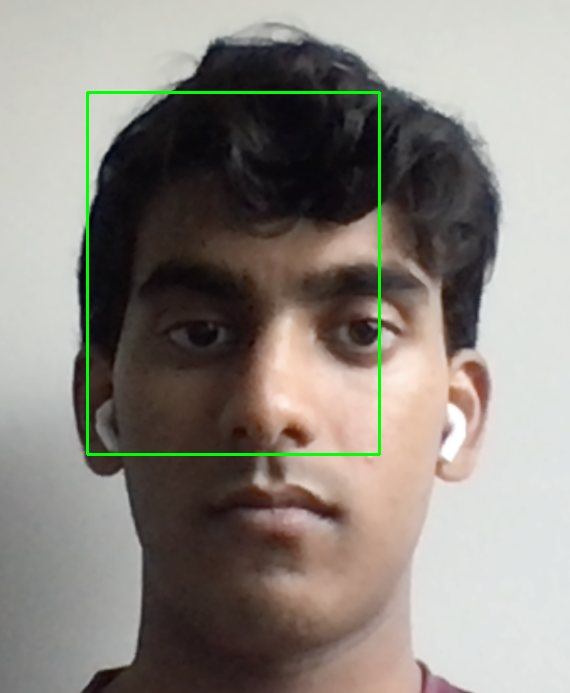

In [22]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image from a file path
image_path = '/content/drive/MyDrive/visionv2/myTest/newImg.png'
image = cv2.imread(image_path)

# Check if image was loaded properly
if image is None:
    print("Error: Image not found or unable to open.")
else:
    # Resize the image to half of its current width and height
    height, width = image.shape[:2]  # Get current dimensions
    new_width = int(width / 2)
    new_height = int(height / 2)
    image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Define the rectangle coordinates (x, y, width, height) assuming 'resized' has the proper values
    x = int(resized[0])
    y = int(resized[1])
    width = int(resized[2])
    height = int(resized[3])

    # Since the image is resized, you may also need to adjust these coordinates
    x = int(x / 2)
    y = int(y / 2)
    width = int(width / 2)
    height = int(height / 2)

    # Draw the rectangle on the resized image
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Display the image using cv2_imshow instead of cv2.imshow
    cv2_imshow(image)
    cv2.waitKey(0)  # This line is not necessary in Colab but can be used if running locally
    cv2.destroyAllWindows()  # This is not necessary in Colab but is included for completeness


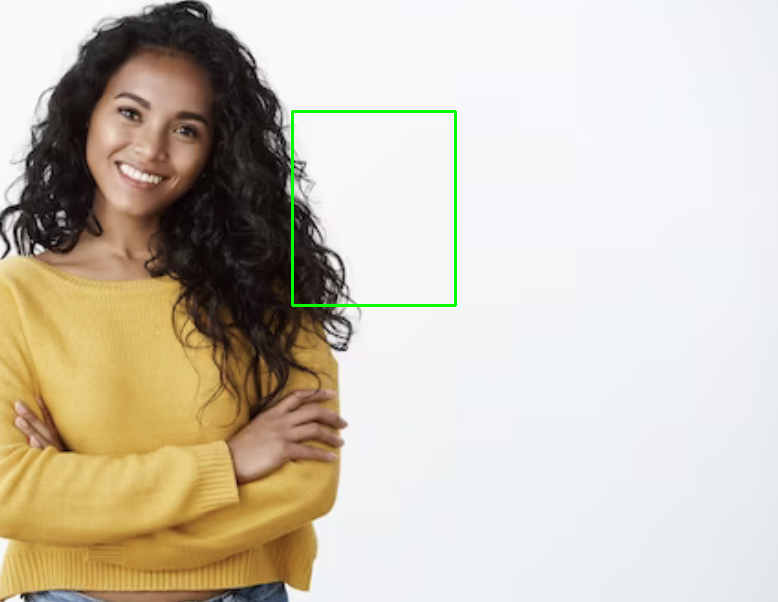

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Function to draw bounding box around face
def draw_face_bounding_box(image, x, y, width, height):
    # Convert parameters to integers
    x = int(x)
    y = int(y)
    width = int(width)
    height = int(height)

    # Draw bounding box on image
    cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)

    return image

'''
# Sample values for x, y, width, height (replace with your CNN output)
x = predicted_box[0]
y = predicted_box[1]
width = predicted_box[2]
height = predicted_box[3]
'''

# Sample values for x, y, width, height (replace with your CNN output)
x = 292.31
y = 111
width = 163
height = 194

# Load image
image_path = '/content/drive/MyDrive/visionv2/myTest/topLeft.png'
image = cv2.imread(image_path)
#image.resize(1024, 1024)

# Draw bounding box
image_with_bounding_box = draw_face_bounding_box(image, x, y, width, height)

# Display image with bounding box
cv2_imshow(image_with_bounding_box)


In [ ]:
def convert_to_original_scale(predicted_box, original_size=1024, model_input_size=128):
    x_center, y_center, width, height = predicted_box
    x_center *= original_size / model_input_size  # Scale x_center to original size
    y_center *= original_size / model_input_size  # Scale y_center to original size
    width *= original_size / model_input_size     # Scale width to original size
    height *= original_size / model_input_size    # Scale height to original size

    # Convert from center to top-left coordinate (x, y)
    x = x_center - (width / 2)
    y = y_center - (height / 2)

    return [x, y, width, height]

# Example conversion
original_box = convert_to_original_scale(predicted_box)
print("Bounding box in original image scale:", original_box)


Bounding box in original image scale: [2.010180115699768, -0.6174159049987793, 2.2899715900421143, 3.2345495223999023]


1/1 [==============================] - 1s 934ms/step
Predicted bounding box in original scale: [2, 0, 2, 2]


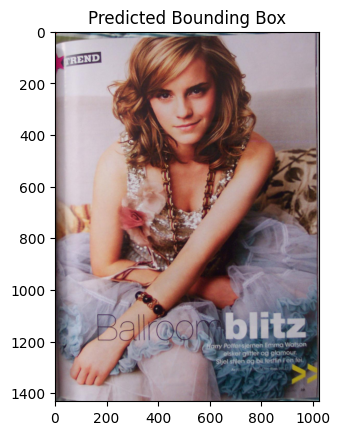

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to the saved model
model_path = '/content/drive/MyDrive/visionv2/face_detection_model.h5'
model = load_model(model_path)

def prepare_image(image_path, target_size=(128, 128)):
    """ Prepare the image for model prediction. """
    with Image.open(image_path) as img:
        img = img.convert('RGB')  # Convert image to RGB
        img = img.resize(target_size)  # Resize the image to the model's input size
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for model input
    return img_array

def predict_bounding_box(model, image_path):
    """ Use the model to predict the bounding box of the face. """
    img_array = prepare_image(image_path)
    predictions = model.predict(img_array)
    return predictions[0]  # Assuming batch size of 1

def convert_to_original_scale(predicted_box, original_size=1024, model_input_size=128):
    """ Convert the normalized bounding box coordinates back to the original image scale. """
    x_center, y_center, width, height = predicted_box
    x_center *= original_size / model_input_size  # Scale x_center to original size
    y_center *= original_size / model_input_size  # Scale y_center to original size
    width *= original_size / model_input_size     # Scale width to original size
    height *= original_size / model_input_size    # Scale height to original size

    # Convert from center to top-left coordinate (x, y)
    x = x_center - (width / 2)
    y = y_center - (height / 2)

    return [int(x), int(y), int(width), int(height)]

def plot_image_with_boxes(img_path, box, title='Predicted Bounding Box'):
    """ Plot the image with the bounding box. """
    fig, ax = plt.subplots(1)
    # Display the image
    with Image.open(img_path) as img:
        ax.imshow(img)

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.title(title)
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/visionv2/myTest/0_Parade_Parade_0_904.jpg'
predicted_box = predict_bounding_box(model, image_path)
original_box = convert_to_original_scale(predicted_box)
print("Predicted bounding box in original scale:", original_box)

plot_image_with_boxes(image_path, original_box)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_images(images, boxes, pred_boxes=None):
    fig, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(15, 5))
    for i, image in enumerate(images):
        axs[i].imshow(image, cmap='gray')
        true_box = patches.Rectangle((boxes[i][0], boxes[i][1]), boxes[i][2]-boxes[i][0], boxes[i][3]-boxes[i][1], linewidth=1, edgecolor='r', facecolor='none')
        axs[i].add_patch(true_box)
        if pred_boxes is not None:
            pred_box = patches.Rectangle((pred_boxes[i][0], pred_boxes[i][1]), pred_boxes[i][2]-pred_boxes[i][0], pred_boxes[i][3]-pred_boxes[i][1], linewidth=1, edgecolor='g', facecolor='none')
            axs[i].add_patch(pred_box)
    plt.show()

# Example usage after predictions
# plot_images(sample_images, actual_boxes, predicted_boxes)
